In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
rng = np.random.default_rng() 

N_homework = 17

ii = rng.integers(N_homework)+1

print(ii)

12


In [3]:
# which pip
# pip install corner

import corner

# https://corner.readthedocs.io/en/latest/pages/quickstart/

# an elegant option is also https://pygtc.readthedocs.io/en/latest/

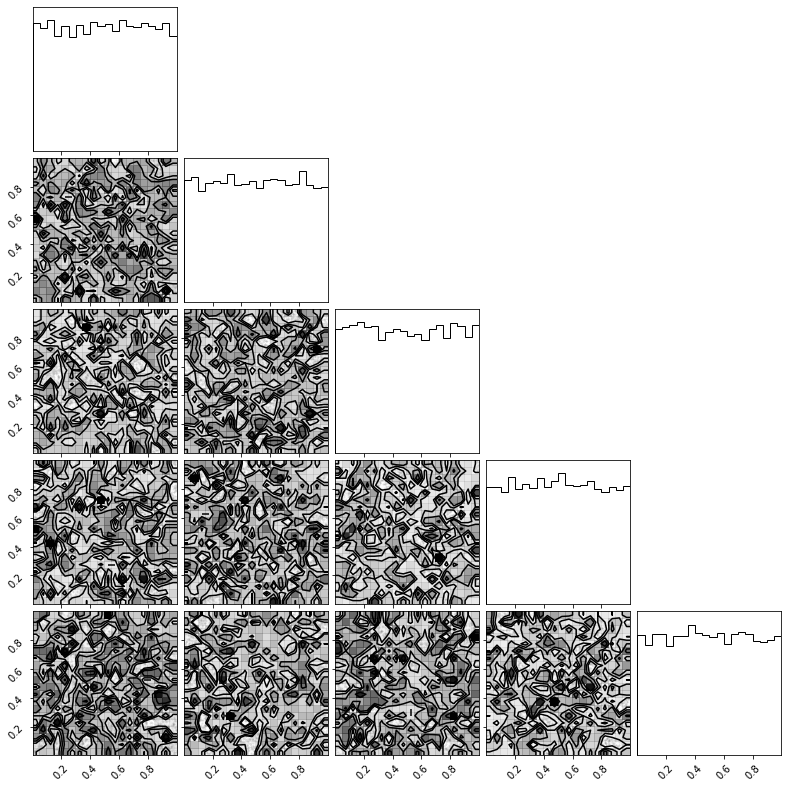

In [4]:
rng = np.random.default_rng(seed=1492)

ndim = 5
Nsample = 10000

uni_ndim = rng.uniform(size=(Nsample, ndim))

figure = corner.corner(uni_ndim)

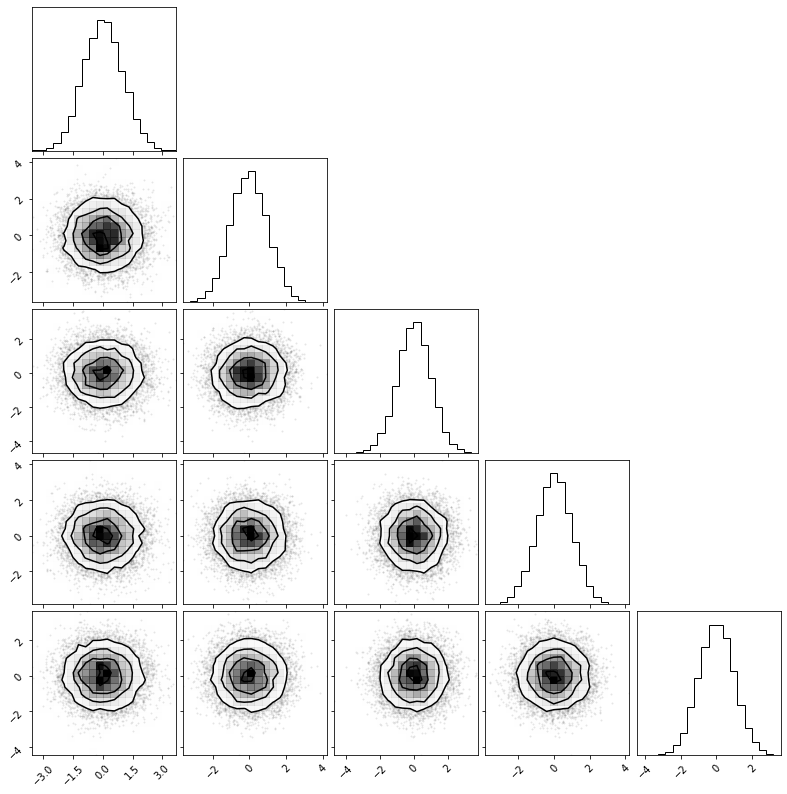

In [5]:

ndim = 5
Nsample = 10000

gaussian_ndim = rng.normal(size=(Nsample, ndim))

figure = corner.corner(gaussian_ndim)

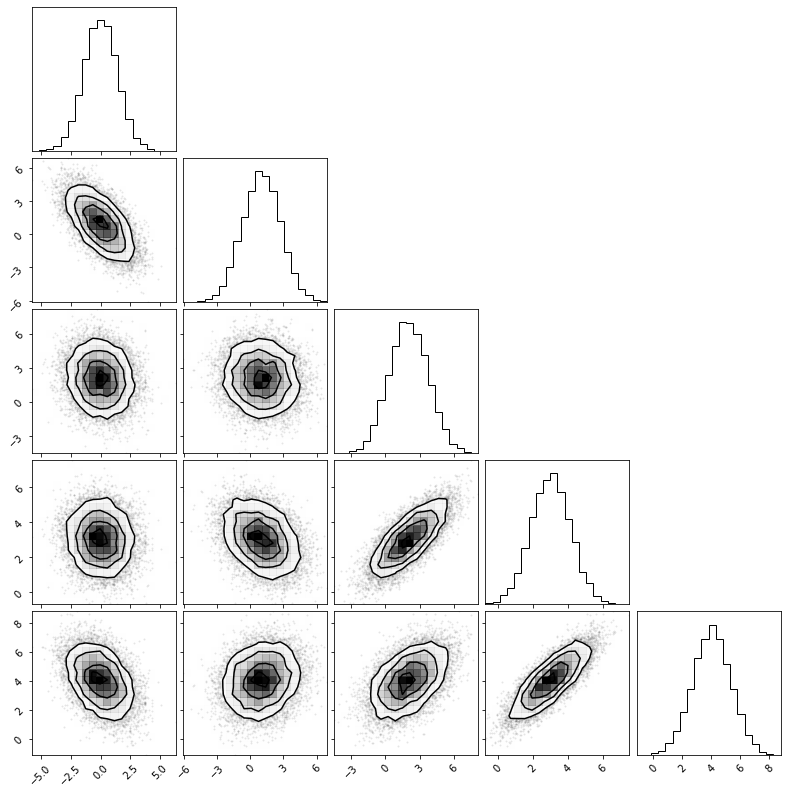

In [7]:
ndim = 5
Nsample = 10000

mu = np.arange(ndim)

M = 2*rng.uniform(size=(ndim, ndim)) - 1

cov = np.dot(M.T, M)

gaussian_ndim = rng.multivariate_normal(mu, cov,
                                        size=Nsample)

figure = corner.corner(gaussian_ndim)

In [22]:
# http://www.galbithink.org/names/us200.htm
# http://www.galbithink.org/names/s19<y><gender>.txt 
# for <y> 00, ..., 90 (year)
# and <gender> m, f      sry ....

In [23]:
# we can download one of those files from the terminal by typing 
# type in terminale

# for year in {0..9}; do wget "http://www.galbithink.org/names/s19${year}0m.txt"; done

In [22]:
data = np.genfromtxt('../../WiSe23/WiSe23--Lecture6/s1910m.txt', 
                     skip_header=5, delimiter=',', dtype=str)
# skip to row 5, delimiter comma, and save it as strings...


In [23]:
print(data)

[['John' '33303']
 ['William' '30401']
 ['James' '23124']
 ...
 ['Silvio' '30']
 ['Pershing' '30']
 ['Hosea' '30']]


In [25]:
# lets get all the decades in one big dataset

data = []

for dec in np.arange(10):
    filename = '../../WiSe23/WiSe23--Lecture6/s19%i0m.txt'%dec
    print(filename)
    
    data.append(np.genfromtxt(filename, skip_header=5, delimiter=',',
                              dtype=str))
    

../../WiSe23/WiSe23--Lecture6/s1900m.txt
../../WiSe23/WiSe23--Lecture6/s1910m.txt
../../WiSe23/WiSe23--Lecture6/s1920m.txt
../../WiSe23/WiSe23--Lecture6/s1930m.txt
../../WiSe23/WiSe23--Lecture6/s1940m.txt
../../WiSe23/WiSe23--Lecture6/s1950m.txt
../../WiSe23/WiSe23--Lecture6/s1960m.txt
../../WiSe23/WiSe23--Lecture6/s1970m.txt
../../WiSe23/WiSe23--Lecture6/s1980m.txt
../../WiSe23/WiSe23--Lecture6/s1990m.txt


In [26]:
all_names = []

for i in range(len(data)):
    all_names += list(data[i][:, 0])
    
print(all_names)

['John', 'William', 'James', 'Joseph', 'Charles', 'George', 'Harry', 'Robert', 'Frank', 'Edward', 'Thomas', 'Henry', 'Walter', 'Frederic', 'Lewis', 'Arthur', 'Raymond', 'Albert', 'Leonard', 'Carl', 'Paul', 'Clarence', 'Samuel', 'Ralph', 'Roy', 'Richard', 'Ernest', 'Earl', 'David', 'Laurence', 'Francis', 'Howard', 'Michael', 'Alfred', 'Herbert', 'Theodore', 'Benjamin', 'Andrew', 'Elmer', 'Jack', 'Jesse', 'Herman', 'Anthony', 'Donald', 'Daniel', 'Peter', 'Kenneth', 'Eugene', 'Floyd', 'Russell', 'Stanley', 'Clyde', 'Lester', 'Edwin', 'Oscar', 'Hugh', 'Philip', 'Alexande', 'Claude', 'Clifford', 'Glen', 'Chester', 'Martin', 'Lloyd', 'Bernard', 'Cecil', 'Irvine', 'Lee', 'Norman', 'Edgar', 'Victor', 'Stephen', 'Harvey', 'Alvin', 'Anton', 'Max', 'Leroy', 'Everett', 'Milton', 'Melvin', 'Allan', 'Morris', 'Homer', 'Otto', 'Leslie', 'Jacob', 'Manuel', 'Nathan', 'Sidney', 'Vincent', 'Marvin', 'Julius', 'Maurice', 'Patrick', 'Virgil', 'Luther', 'Juan', 'Vernon', 'August', 'Archie', 'Rudolph', 'Arno

In [28]:
unique_names = np.unique(all_names)

print(unique_names)
print(len(unique_names))

['Aaron' 'Abdiel' 'Abdul' ... 'Zakary' 'Zane' 'Zigmund']
1694


In [30]:
# now we need to set up the table with P( names | year ).
# for this, we first need to figure out all the possible names...

p_nameGyear = np.zeros( (len(data), len(unique_names)) )

years = 1900 + 10*np.arange(10)

for i, dt in enumerate(data):
    for j, name in enumerate(unique_names):
        idx = np.where(dt[:, 0]==name)[0]
        if len(idx)==0:
            continue
        else:
            p_nameGyear[i, j] = int(dt[idx, 1])

In [31]:
print(p_nameGyear)

[[ 356.    0.    0. ...    0.    0.    0.]
 [ 384.    0.    0. ...    0.    0.   31.]
 [ 446.    0.    0. ...    0.   46.    0.]
 ...
 [5202.    0.   45. ...    0.   68.    0.]
 [7322.    0.    0. ...    0.  123.    0.]
 [6130.   61.    0. ...   92.  359.    0.]]


In [33]:
norm_y = np.sum(p_nameGyear, axis=1)

p_nameGyear /= norm_y[:, None]

Abdullah


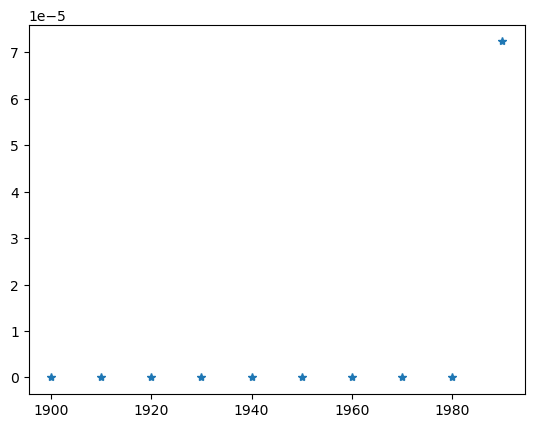

In [37]:
ii = 3
print(unique_names[ii])
_ =  plt.plot(years, p_nameGyear[:, ii], '*')

In [40]:
tmp = np.genfromtxt('../../WiSe23/WiSe23--Lecture6/births_and_birth_rates.txt', dtype=str)

print(tmp.shape)
for i in range(tmp.shape[0]):
    tmp[i, 1] = tmp[i, 1].replace(',',  '')

(57, 3)


[1900. 1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000.]


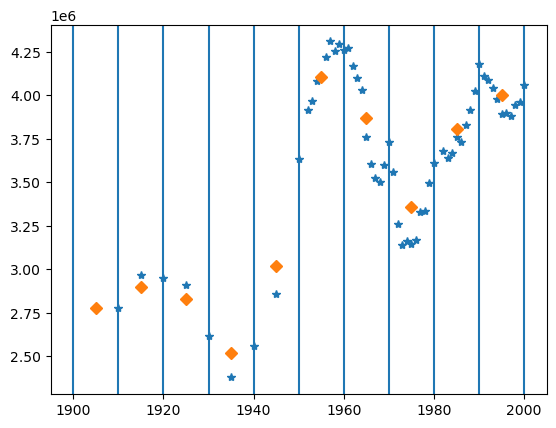

In [41]:
# needs to be a probability in name every year!! so normalize it for every year

births = np.array(tmp.astype('float'))

plt.plot(births[:, 0], births[:, 1], '*')

years2 = np.zeros(len(years)+1)
years2[:-1] = years
years2[-1] = 2000
print(years2)
for yy in years2:
    plt.axvline(yy)
    
prior = np.zeros(len(years))

for i in range(len(years)):
    mask = np.where( (years2[i]<=births[:, 0]) & (births[:, 0]<=years2[i+1]) )[0]
    if len(mask)==0:
        prior[i] = births[0, 1]
    else:
        prior[i] = np.mean(births[mask, 1])

plt.plot(years+5, prior, 'D')

prior /= np.sum(prior)

# there where almost twice as many births in the 50ties compared to the 30ties.
# Guess the men where busy elsewhere...

In [43]:
P_name = np.sum(p_nameGyear*prior[:, None], axis=0)
P_name_flat = np.sum(p_nameGyear/len(years), axis=0)

In [47]:
# Bayes Theorem

P_yearGname = p_nameGyear*prior[:, None]/P_name[None, :]
P_yearGname_flat = p_nameGyear/P_name_flat[None, :]/len(years)

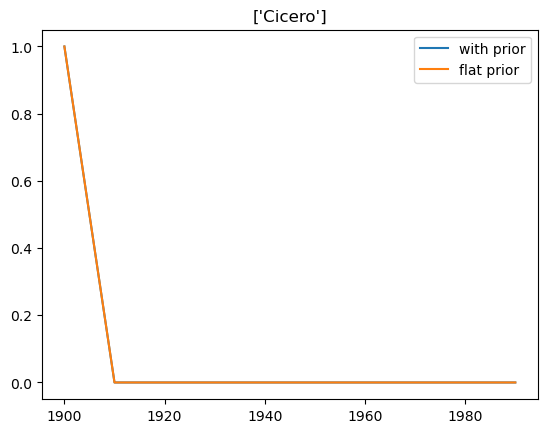

In [56]:


 # Dwight: 500 Dwight Eisenhower, General in WW2 and then President..., peaks in the 50ties....

#abdullah

# Frank, Henry are an old mans name; oke, Cicero's are rly old

# giovanni is bimodal,  Hipolito

# John, James is are great examples of the effect of the prior we choose

# justin  # not pc, i guess Gaylord

# abdullah is a informative

ii = np.where(unique_names=='Cicero')[0]

plt.title(unique_names[ii])
plt.plot(years, P_yearGname[:, ii], label='with prior')
plt.plot(years, P_yearGname_flat[:, ii], label='flat prior')

plt.legend(loc='best')

In [57]:
# repeat the excercise with female names.
# find a names that is very informative on the year of birth, one where the prior matters,
# one which has a clear peak, independently of the prior,
# and one that is bimodal (has to peaks)